In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of district names
district_list = [
    "bilecik ort sıcaklık",
]

# Create folders for each district if they don't exist
for district in district_list:
    folder_name = district.lower().replace(" ", "_")
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

# Repeat the operations for each district
for district in district_list:
    # Create a filename specific to the district
    filename = f'{district}.csv'
    
    # Load the data
    df = pd.read_csv(filename, delimiter=';', parse_dates=[0], dayfirst=True)
    
    # Define the column names
    df.columns = ['Date', 'Temperature']
    
    # Ensure the Temperature column is numeric
    df['Temperature'] = pd.to_numeric(df['Temperature'].str.replace(',', '.'), errors='coerce')
    
    # Add Year and Month columns
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    

In [2]:
# Calculate the total temperature for each year and month
monthly_totals = df.groupby(['Year', 'Month'])['Temperature'].sum().unstack()
print(monthly_totals)

Month        1         2         3         4         5         6         7   \
Year                                                                          
1994   128.0505   45.4727  170.4419  386.7641  482.1101  536.8775  650.2115   
1995    91.1666  119.6716  179.3557  268.3099  458.6182  607.8366  600.9979   
1996     0.4085   91.2993   62.9744  234.2690  521.7894  533.3410  650.1499   
1997    76.9062   -3.8195   62.0167  176.0251  489.4204  549.2706  626.5099   
1998    57.3271   94.3850   87.4575  359.9962  441.2862  539.7306  657.5190   
1999   108.0991   72.6457  192.0888  334.2359  480.6935  547.1426  674.6858   
2000   -99.6891   32.5044  100.1366  356.2832  434.4697  532.5729  698.4926   
2001   102.5028   79.7526  306.2236  328.4610  427.2100  580.8492  703.9738   
2002   -91.5673  135.7581  222.5778  274.6243  444.3219  553.3657  705.8451   
2003   148.2665  -34.4178   46.1615  237.4941  534.4040  604.8901  659.2739   
2004    10.4014   26.0679  186.8927  310.7556  434.9

In [3]:
# Calculate the total temperature for each year
yearly_totals = df.groupby('Year')['Temperature'].sum()
print(yearly_totals)

Year
1994    4394.7025
1995    4010.5043
1996    3968.6032
1997    3652.9579
1998    4242.4898
1999    4419.3332
2000    3952.4314
2001    4371.6154
2002    4058.6001
2003    4086.3596
2004    4162.6035
2005    4178.9970
2006    4151.7084
2007    4523.1610
2008    4433.3082
2009    4459.2543
2010    4797.7909
2011    3948.9841
2012    4493.1336
2013    4560.6456
2014    4685.5231
2015    4342.8886
2016    4532.2174
2017    4342.9643
2018    4846.5405
2019    4646.4785
2020    4733.9942
2021    4465.0590
2022    4281.4385
2023       2.2354
Name: Temperature, dtype: float64


In [4]:
# Convert the horizontal table to a string and add borders
table_horizontal = monthly_totals.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
)

In [5]:
# Convert the vertical table to a string and add borders
table_vertical = yearly_totals.to_frame().style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
)

<Figure size 1600x1000 with 0 Axes>

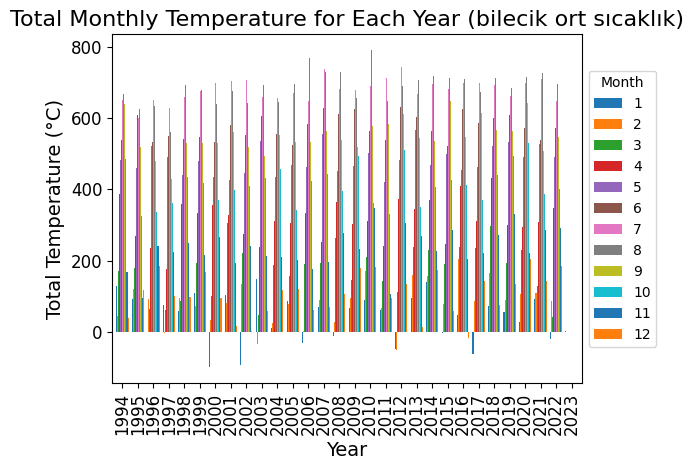

In [6]:
# Create a bar chart (total temperature for each month of each year)
plt.figure(figsize=(16, 10))
monthly_totals.plot(kind='bar', width=0.8)
plt.title(f'Total Monthly Temperature for Each Year ({district})', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Temperature (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Month', fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(f'{folder_name}/{folder_name}_monthly_totals.png')
plt.show()
plt.close()


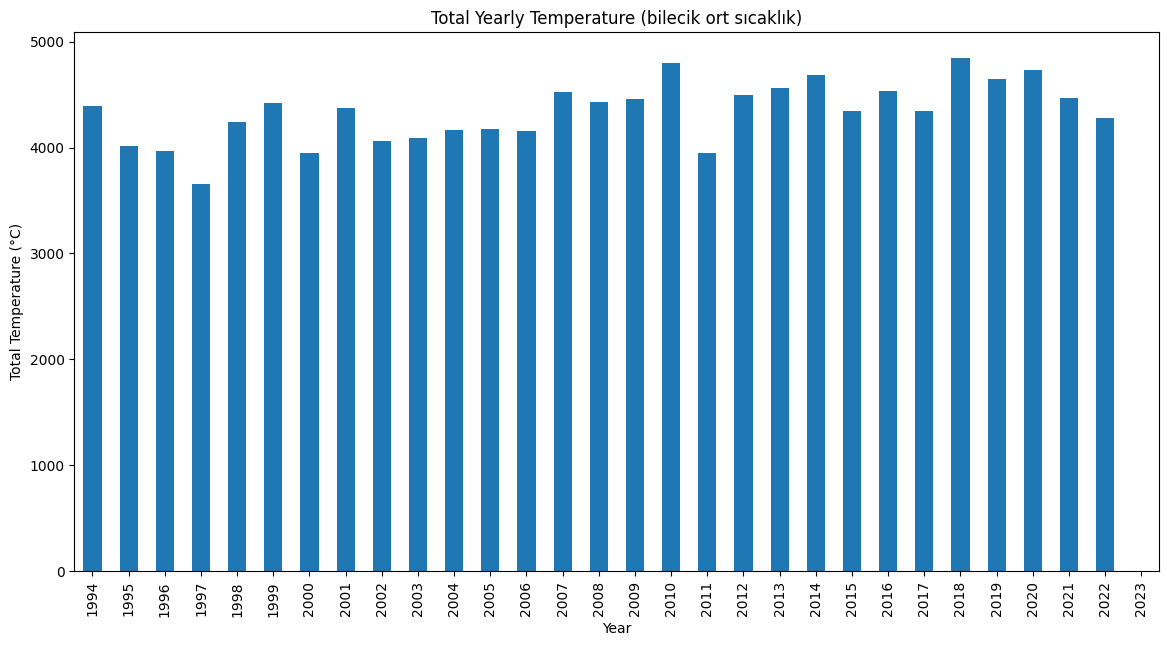

In [7]:
# Create a bar chart (total temperature for each year)
plt.figure(figsize=(14, 7))
yearly_totals.plot(kind='bar')
plt.title(f'Total Yearly Temperature ({district})')
plt.xlabel('Year')
plt.ylabel('Total Temperature (°C)')
plt.savefig(f'{folder_name}/{folder_name}_yearly_totals.png')
plt.show()
plt.close()

In [8]:
# Save the monthly totals to a CSV file
monthly_totals.to_csv(f'{folder_name}/{folder_name}_monthly_totals.csv')

# Save the yearly totals to a CSV file
yearly_totals.to_csv(f'{folder_name}/{folder_name}_yearly_totals.csv')